# LSTM Tutorial

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.layers import *
from keras.models import Sequential, Model
from keras.optimizers import *

## Data Preprocessing

### Load data

In [2]:
df = pd.read_csv("GOOG.csv")

In [39]:
# Print data
df.drop(index=0, inplace=True)

,Date,Open,High,Low,Close,Adj Close,Volume
1,2015-01-02,526.114746,528.362366,521.231628,521.937744,521.937744,1447600
2,2015-01-05,520.396240,521.460388,510.252045,511.057617,511.057617,2059800
3,2015-01-06,512.181458,513.350037,498.307800,499.212799,499.212799,2899900
4,2015-01-07,504.225220,504.467896,496.915436,498.357513,498.357513,2065100
5,2015-01-08,495.264526,500.724487,488.312805,499.928864,499.928864,3353600
6,2015-01-09,501.997498,502.156616,492.082062,493.454498,493.454498,2069400
7,2015-01-12,492.231232,493.261566,484.891632,489.854309,489.854309,2322400
8,2015-01-13,496.109894,500.227234,489.695190,493.464447,493.464447,2370500
9,2015-01-14,491.942810,500.475861,490.301849,498.128784,498.128784,2235700
10,2015-01-15,502.803040,502.912445,495.035797,499.043732,499.043732,2715800


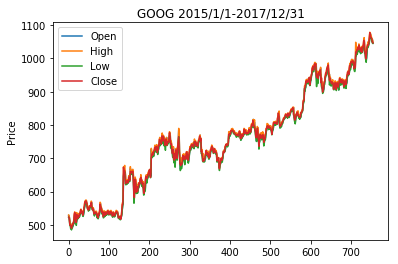

In [4]:
# Visualize data
plt.plot(df["Open"], label="Open")
plt.plot(df["High"], label="High")
plt.plot(df["Low"], label="Low")
plt.plot(df["Close"], label="Close")
plt.title("GOOG 2015/1/1-2017/12/31")
plt.ylabel("Price")
plt.legend()
plt.show()

In [23]:
# Get data array
data = df.drop(columns=["Date", "High", "Low", "Adj Close"]).values

### Data Normalization
*There are some outliers in this case so instead of min-max scaling, we use standard normalize*

In [25]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

norm_data = (data - means) / stds

### Split Timestep

In [97]:
split_data = np.zeros((norm_data.shape[0]-20+1, 20, 3))
for i in range(0, norm_data.shape[0]-20+1):
    split_data[i] = norm_data[i:i+20]

### Split Train/Test Data

### Split Features & Targets

## Build Model

In [45]:
model = Sequential()
model.add(LSTM(1, return_sequences=True, stateful=True, batch_input_shape=(32, 20, 2)))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(20, activation="tanh"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (32, 20, 1)               16        
_________________________________________________________________
flatten_3 (Flatten)          (32, 20)                  0         
_________________________________________________________________
dense_7 (Dense)              (32, 64)                  1344      
_________________________________________________________________
dense_8 (Dense)              (32, 32)                  2080      
_________________________________________________________________
dense_9 (Dense)              (32, 20)                  660       
Total params: 4,100
Trainable params: 4,100
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [ ]:
model.compile(optimizer="adam", loss="mse")
model.fit(train_x, train_y, batch_size=32, epochs=100, shuffle=False)

## Test Model

### Stationary Data